## countplot
**A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
url='https://github.com/mathawanup/learn_dataset/raw/master/car_mpg.csv'
df=pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


### ข้อมูลที่เหมาะกับการใช้ countplot จะเป็นการนับข้อมูลที่เป็น discrete variable

<AxesSubplot:xlabel='class', ylabel='count'>

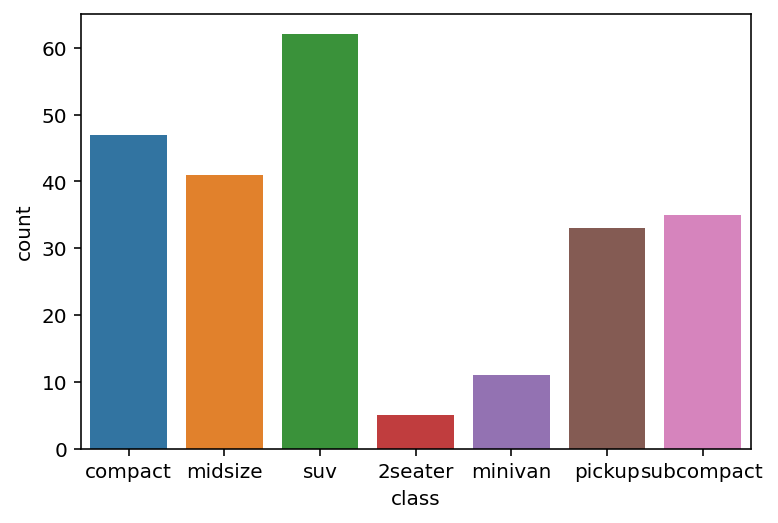

In [3]:
#อยากทราบว่า รถในแต่ละ class มีจำนวนเท่าไหร่ x='clss'
sns.countplot(x='class', data=df)

<AxesSubplot:xlabel='year', ylabel='count'>

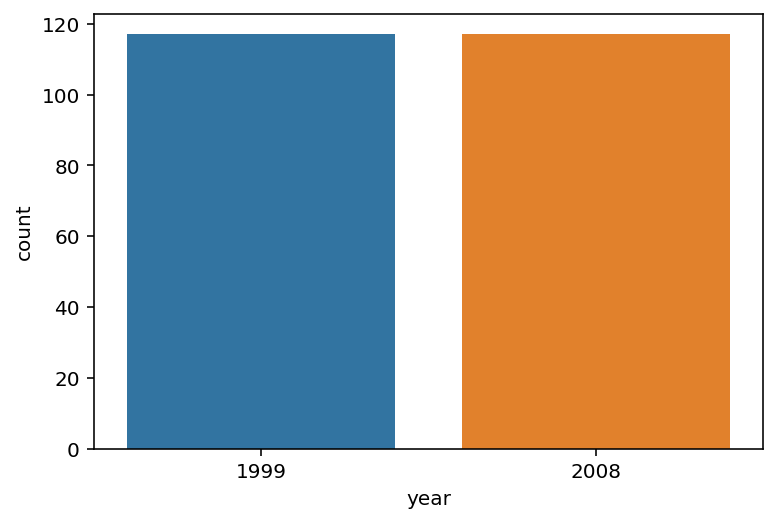

In [4]:
#อยากทราบว่า รถในแต่ละ year มีผลิตรถเท่าไหร่ x='year'
sns.countplot(x='year', data=df)

<AxesSubplot:xlabel='cty', ylabel='count'>

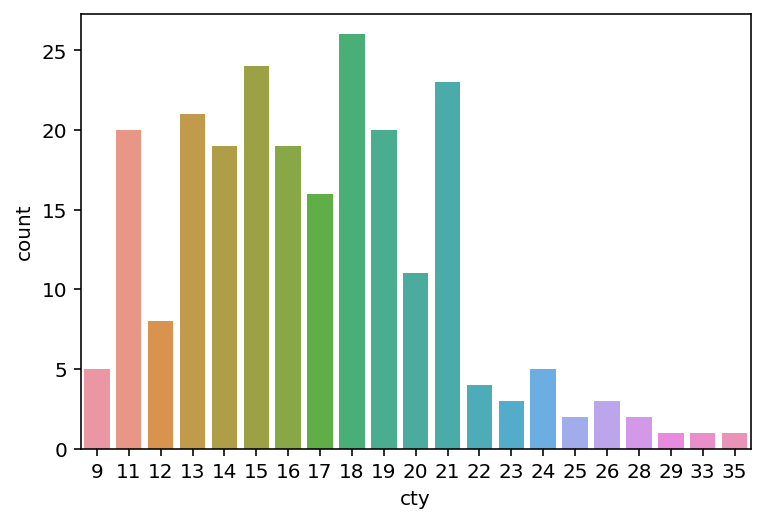

In [5]:
#แสดงกราฟของ cty
sns.countplot(x='cty', data=df) 

### การสร้างกราฟและกำหนดขนาดของกราฟ set chart figure(รูปกราฟ) size  (figure เปรียบเหมือน canvas) 

<AxesSubplot:xlabel='manufacturer', ylabel='count'>

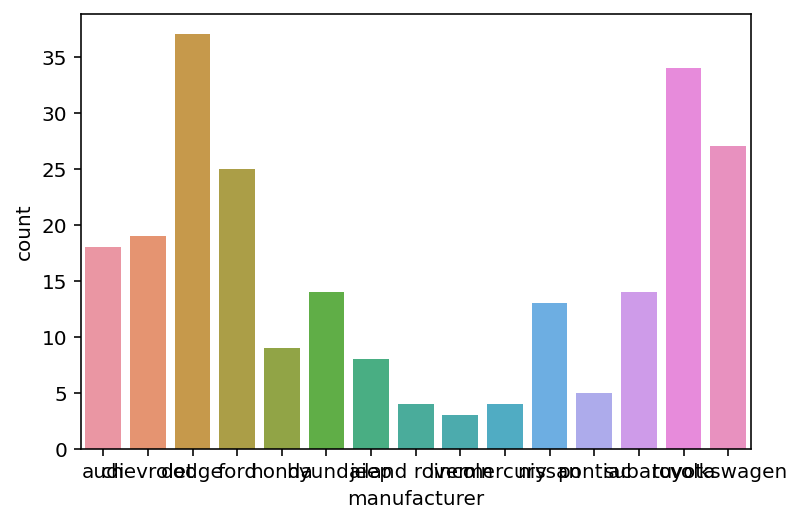

In [6]:
#แสดงกราฟของ manufacturer
sns.countplot(x='manufacturer', data=df)

<AxesSubplot:xlabel='count', ylabel='manufacturer'>

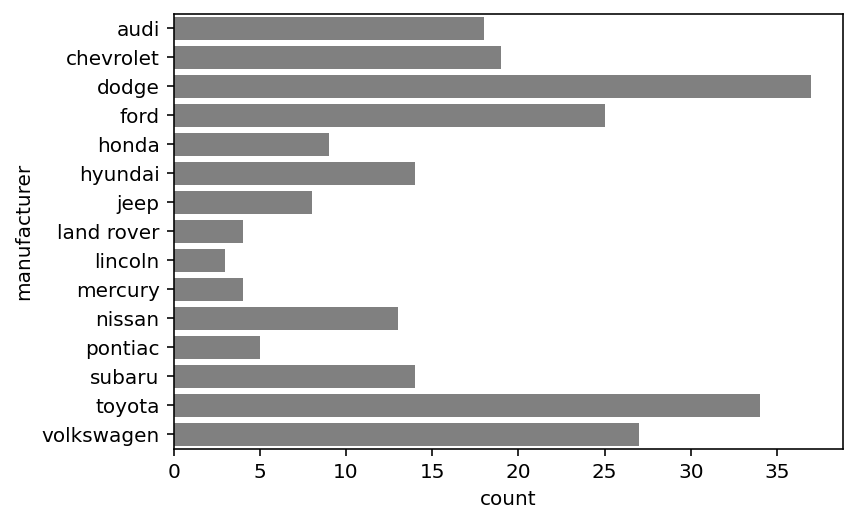

In [8]:
#หมุนแกลน x , y
sns.countplot(y='manufacturer', data=df, color='gray')

<AxesSubplot:xlabel='class', ylabel='count'>

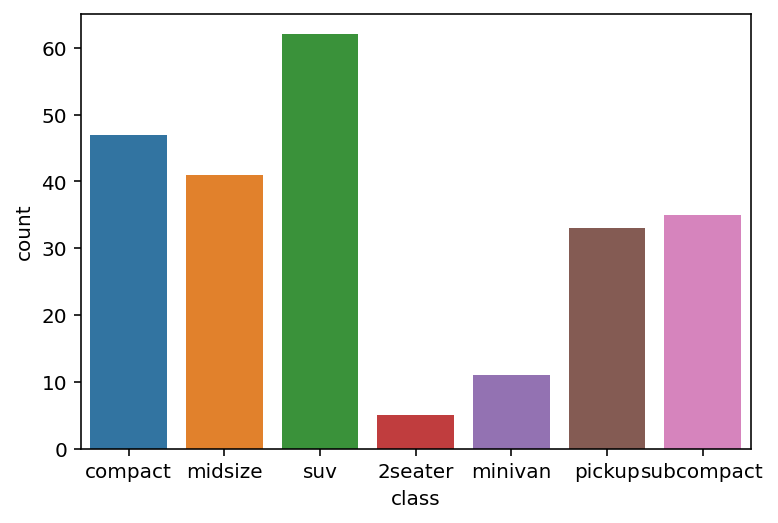

In [9]:
sns.countplot(x='class', data=df) 

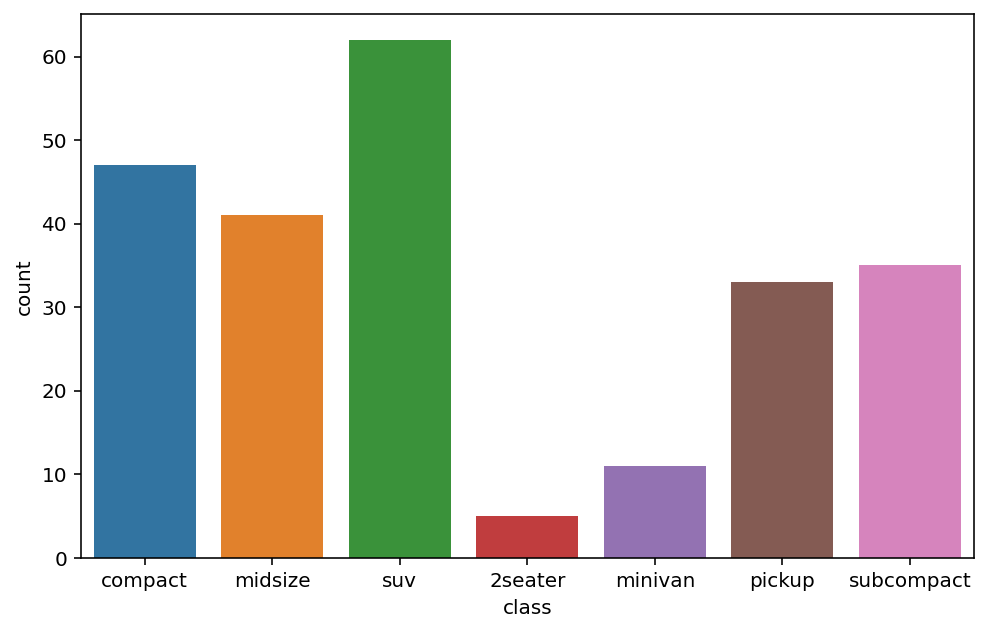

In [10]:
#ปรับขนาด
plt.figure(figsize=(8, 5)) 
sns.countplot(x='class', data=df);

### การจัดรูปแบบของกราฟ หรือการจัดเรียงกราฟ (countplot order by value_counts)

In [11]:
# เรียงจากมากไปน้อย
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [12]:
df['class'].value_counts().index 

Index(['suv', 'compact', 'midsize', 'subcompact', 'pickup', 'minivan',
       '2seater'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='count'>

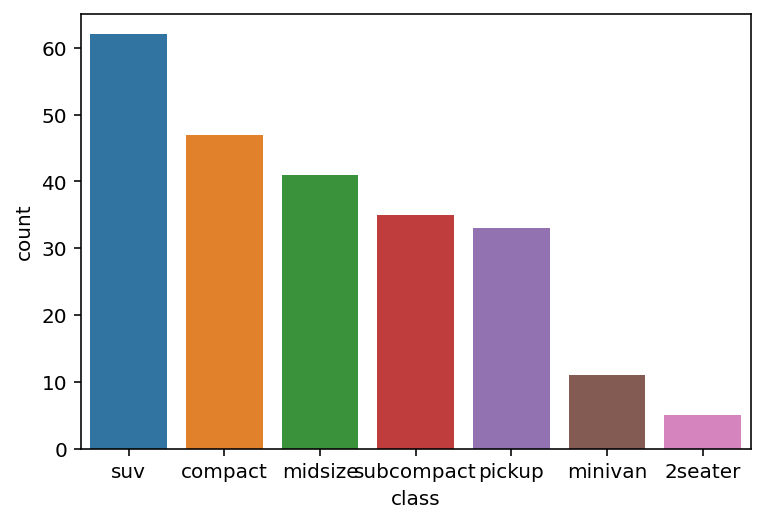

In [6]:
#แสดงกราฟที่แรียงจากมากไปน้อย
#ปรับจากน้อยไปมาก้ assending
sns.countplot(x = 'class', data = df,
              order = df['class'].value_counts().index,
             )


<AxesSubplot:xlabel='class', ylabel='count'>

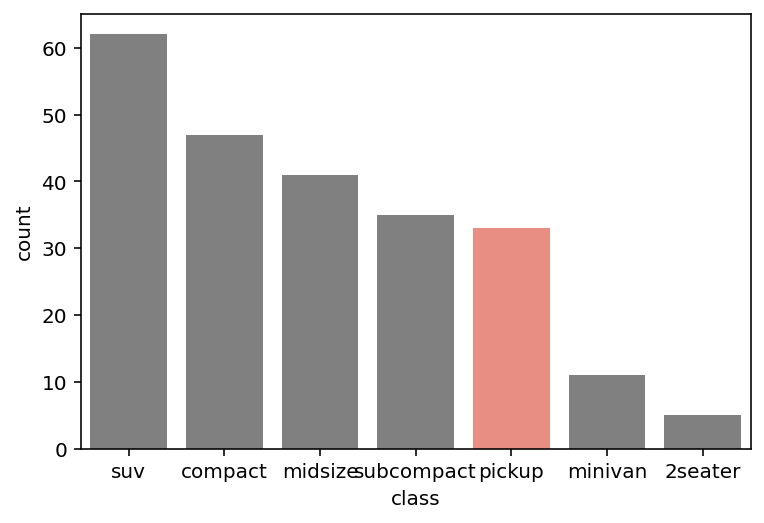

In [15]:
 #ให้ลูกค้า focus สีที่กำหนด
p = ["salmon" if v == 'pickup' else "gray" 
    for v in df['class'].value_counts().index]
sns.countplot(x = 'class', 
              data = df,
              order = df['class'].value_counts().index,
              palette=p  #เปลี่ยนเป็นค่าี่กำหนด
    )


<AxesSubplot:xlabel='drv', ylabel='count'>

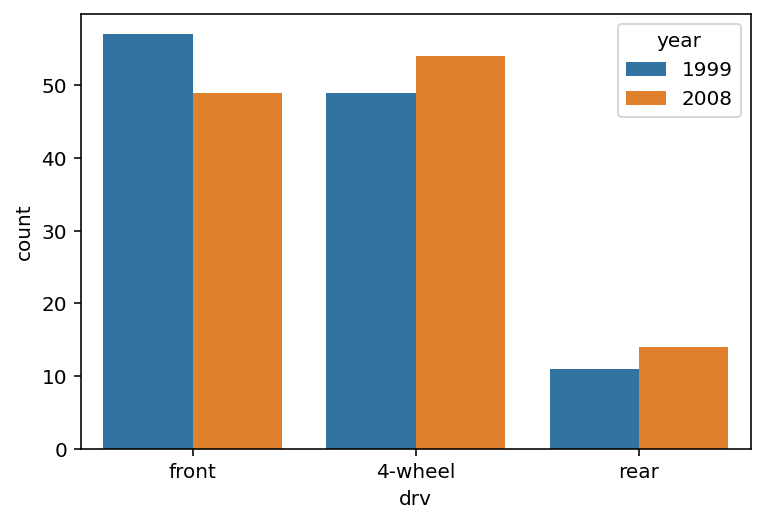

In [16]:
#แสดงกราฟสองแทงเปรียบเทียบกัน
sns.countplot(x='drv', data=df, 
              hue='year')

Text(0.5, 0, '')

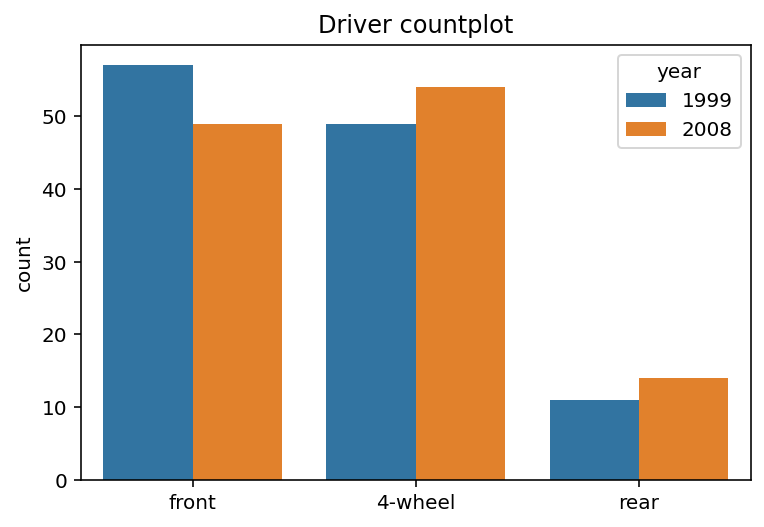

In [17]:
#ใส่ title
sns.countplot(x='drv', data=df, 
              hue='year')
plt.title('Driver countplot')
plt.xlabel('')

### การหาค่าเฉลี่ยของข้อมูล(average) และเพิ่ม average line ลงในกราฟ  

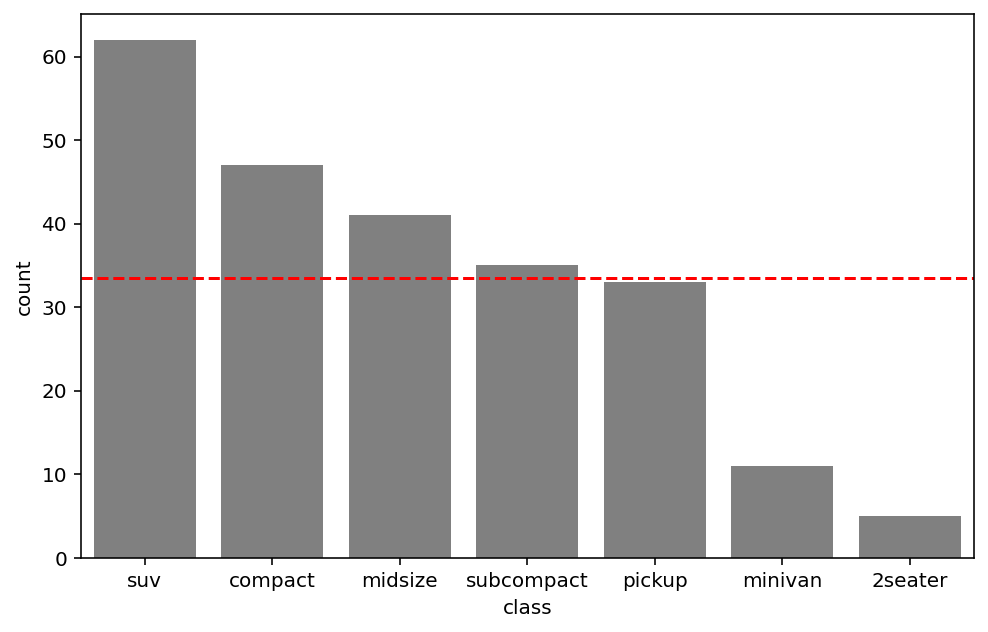

In [10]:
# horizontal average line 

avg=df['class'].value_counts().mean()

plt.figure(figsize=(8,5))
sns.countplot(x = 'class',
              data = df,
              color = 'gray',
              order = df['class'].value_counts().index)

plt.axhline(y=avg  , linestyle='--', color='red')

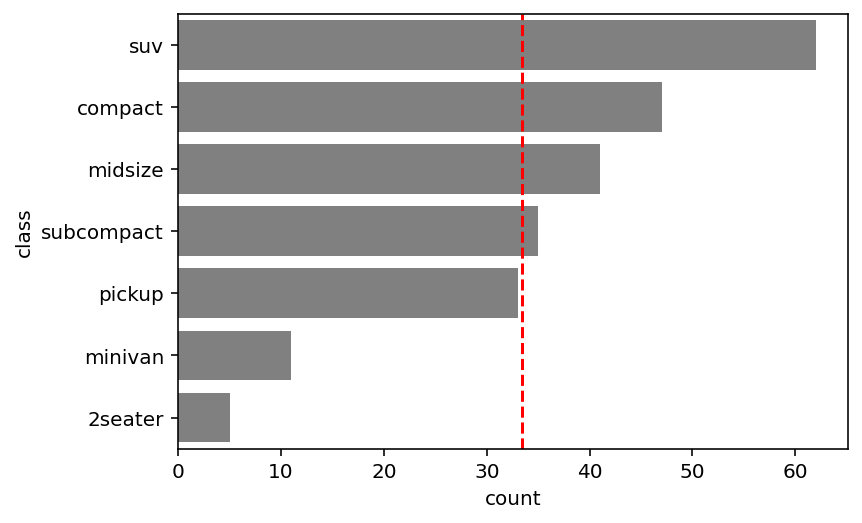

In [11]:
#สร้าง verticle average line 
avg=df['class'].value_counts().mean()
sns.countplot(y = 'class',
              data = df,
              color = 'gray',
              order = df['class'].value_counts().index)


plt.ylabel=''
plt.axvline(x=avg  , linestyle='--', color='red')

In [12]:
# ถ้ากราฟไหนมีค่ามากกว่าค่าเฉลี่ย จะเปลี่ยนเป็นสี tomato
avg=df['class'].value_counts().mean()

colors = ['tomato' if (x > avg) else 'gray' for x in df['class'].value_counts()]
colors

['tomato', 'tomato', 'tomato', 'tomato', 'gray', 'gray', 'gray']

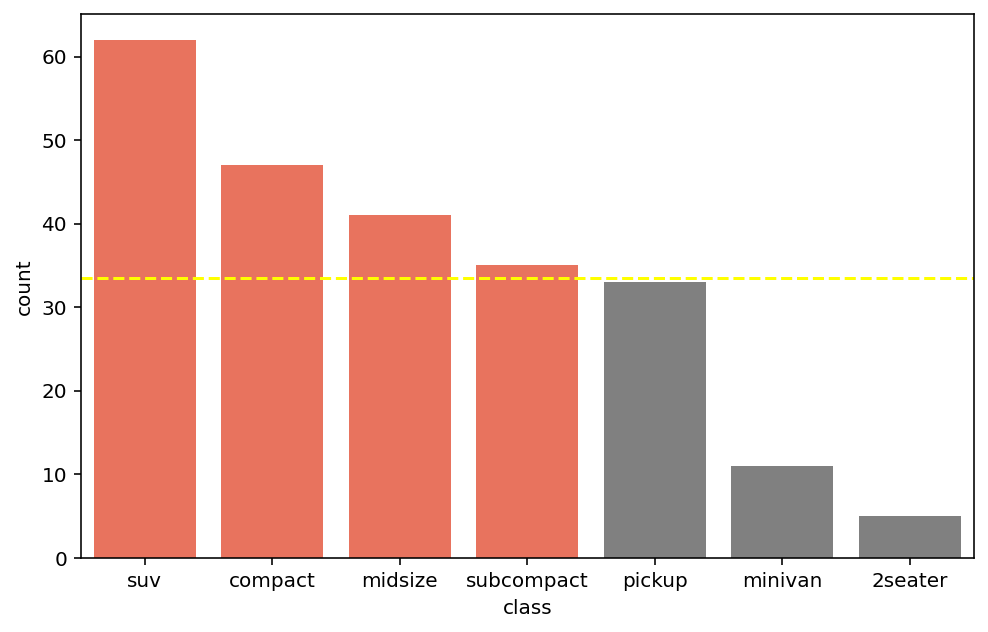

In [13]:
# แสดงกราที่มีค่ามากกว่าค่าเฉลี่ย จะเปลี่ยนเป็นสี tomato
plt.figure(figsize=(8, 5))
sns.countplot(x = 'class',
              data = df,
              order = df['class'].value_counts().index,
              palette=colors
             )
plt.axhline(y=avg, linestyle='--', color='yellow')